<a href="https://colab.research.google.com/github/FrankDagbe/Machine_Learning_Projects/blob/main/Energy_Data_of_a_Household_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### P.S: Plotly Visualizations are not Showing in Github.
####Kindly Open in Colab to View Plotly Visualizations

# Energy Consumption Forecasting Project

**Project Description:**

This Python script is part of an energy consumption forecasting project. The goal is to analyze historical energy consumption data and build a predictive model, specifically using Long Short-Term Memory (LSTM) neural networks. The project involves data preprocessing, visualization, scaling, and the development of a deep learning model to forecast energy consumption based on various features.

---

# Code Section 1: Importing Libraries

In this section, we import essential libraries such as Pandas, NumPy, Matplotlib, Keras, scikit-learn, Plotly, and TensorFlow. These libraries provide tools for data manipulation, visualization, machine learning, and deep learning.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Code Section 2: Loading and Exploring Data
This section reads energy consumption data from a CSV file hosted online. It then displays the first few rows, last few rows, and provides information about the dataset, including data types and missing values.

In [3]:
# Load the dataset from a URL
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [4]:
# Display the first few rows of the dataset
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Display the last few rows of the dataset
data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [6]:
# Get information about the dataset, including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#Code Section 3: Data Preprocessing
This section selects specific columns of interest from the dataset, converts the 'date' column to a datetime format, and sets it as the index. It also includes data visualization using Matplotlib and Plotly.

In [7]:
# Select specific columns of interest from the dataset
data[['date','T_out','RH_1','Appliances','lights' , 'Visibility']]

,date,T_out,RH_1,Appliances,lights,Visibility
0,2016-01-11 17:00:00,6.600000,47.596667,60,30,63.000000
1,2016-01-11 17:10:00,6.483333,46.693333,60,30,59.166667
2,2016-01-11 17:20:00,6.366667,46.300000,50,30,55.333333
3,2016-01-11 17:30:00,6.250000,46.066667,50,40,51.500000
4,2016-01-11 17:40:00,6.133333,46.333333,60,40,47.666667
...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,46.560000,100,0,23.666667
19731,2016-05-27 17:30:00,22.600000,46.500000,90,0,24.500000
19732,2016-05-27 17:40:00,22.466667,46.596667,270,10,25.333333
19733,2016-05-27 17:50:00,22.333333,46.990000,420,10,26.166667


In [8]:
# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data.set_index('date',inplace=True)
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

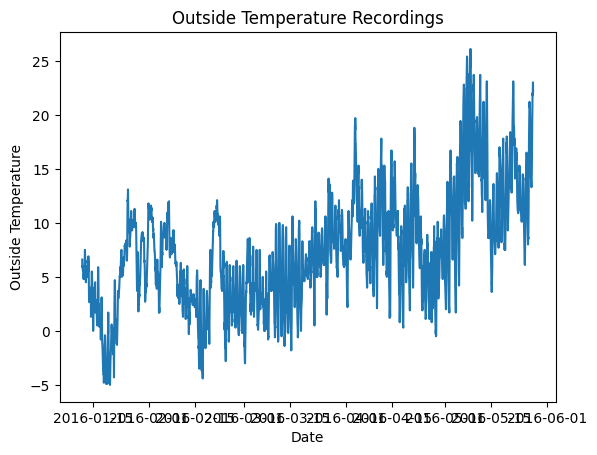

In [10]:
# Create a Matplotlib plot of 'Outside Temperature' over time
fig, ax = plt.subplots()
ax.plot(data.index, data['T_out'],)
ax.set_xlabel('Date')
ax.set_ylabel('Outside Temperature')
ax.set_title('Outside Temperature Recordings')
plt.show()


(DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
                '2016-01-11 17:20:00', '2016-01-11 17:30:00',
                '2016-01-11 17:40:00', '2016-01-11 17:50:00',
                '2016-01-11 18:00:00', '2016-01-11 18:10:00',
                '2016-01-11 18:20:00', '2016-01-11 18:30:00',
                ...
                '2016-05-27 16:30:00', '2016-05-27 16:40:00',
                '2016-05-27 16:50:00', '2016-05-27 17:00:00',
                '2016-05-27 17:10:00', '2016-05-27 17:20:00',
                '2016-05-27 17:30:00', '2016-05-27 17:40:00',
                '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
               dtype='datetime64[ns]', name='date', length=19735, freq=None),
 array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>], dtype=object))

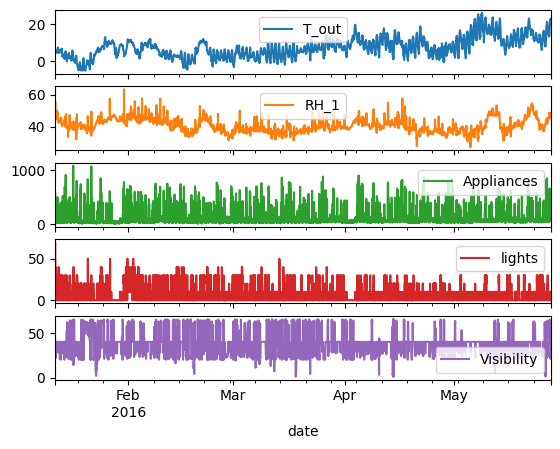

In [11]:
data.index, data[['T_out','RH_1','Appliances','lights' , 'Visibility' ]].plot(subplots=True)

In [31]:
import plotly.express as px

# Create the plot for 'Temperature'
fig1 = px.line(data, data.index, data['T_out'], title='Outside Temperature Recordings',)
fig1.update_traces(line=dict(color='red'))
fig1.update_xaxes(rangeslider_visible=True)
fig1.show()

# Create the plot for 'RH_1'
fig2 = px.line(data, x=data.index, y=['RH_1'], title='RH_1 Line Plot')
fig2.update_traces(line=dict(color='blue'))
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

# Create the second plot for 'Appliances'
fig3 = px.line(data, x=data.index, y=['Appliances'], title='Appliances Line Plot')
fig3.update_traces(line=dict(color='green'))
fig3.update_xaxes(rangeslider_visible=True)
fig3.show()

# Create the third plot for 'lights'
fig4 = px.line(data, x=data.index, y=['lights'], title='Lights Line Plot')
fig4.update_traces(line=dict(color='magenta'))
fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

# Create the third plot for 'Visibility'
fig5 = px.line(data, x=data.index, y=['Visibility'], title='Visibility Line Plot')
fig5.update_traces(line=dict(color='grey'))
fig5.update_xaxes(rangeslider_visible=True)
fig5.show()

In [13]:
ml_data=data[['T_out','RH_1','Appliances', 'Visibility' ]]
ml_data

,T_out,RH_1,Appliances,Visibility
date,,,,
2016-01-11 17:00:00,6.600000,47.596667,60,63.000000
2016-01-11 17:10:00,6.483333,46.693333,60,59.166667
2016-01-11 17:20:00,6.366667,46.300000,50,55.333333
2016-01-11 17:30:00,6.250000,46.066667,50,51.500000
2016-01-11 17:40:00,6.133333,46.333333,60,47.666667
...,...,...,...,...
2016-05-27 17:20:00,22.733333,46.560000,100,23.666667
2016-05-27 17:30:00,22.600000,46.500000,90,24.500000
2016-05-27 17:40:00,22.466667,46.596667,270,25.333333


In [14]:
ml_data.describe()

,T_out,RH_1,Appliances,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,40.259739,97.694958,38.330834
std,5.317409,3.979299,102.524891,11.794719
min,-5.000000,27.023333,10.000000,1.000000
25%,3.666667,37.333333,50.000000,29.000000
50%,6.916667,39.656667,60.000000,40.000000
75%,10.408333,43.066667,100.000000,40.000000
max,26.100000,63.360000,1080.000000,66.000000


In [15]:
ml_data.query('Appliances > 500')

,T_out,RH_1,Appliances,Visibility
date,,,,
2016-01-11 18:50:00,5.983333,46.396667,580,40.000000
2016-01-13 21:20:00,2.900000,41.530000,520,36.333333
2016-01-14 10:20:00,2.033333,43.433333,550,40.000000
2016-01-14 10:30:00,2.100000,43.766667,690,40.000000
2016-01-14 10:40:00,2.166667,43.693333,620,40.000000
...,...,...,...,...
2016-05-26 17:20:00,20.833333,44.066667,600,40.000000
2016-05-26 17:30:00,20.900000,43.366667,520,40.000000
2016-05-27 09:40:00,15.900000,47.226667,580,61.000000


#Code Section 4: Data Scaling
This section scales the selected data using Min-Max scaling to normalize the values between 0 and 1.

In [16]:
# Scale the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ml_data)

In [17]:
scaled_data

array([[0.37299035, 0.56618659, 0.04672897, 0.95384615],
       [0.36923901, 0.54132648, 0.04672897, 0.89487179],
       [0.36548767, 0.53050179, 0.03738318, 0.83589744],
       ...,
       [0.88317256, 0.53866618, 0.24299065, 0.37435897],
       [0.87888532, 0.54949087, 0.38317757, 0.38717949],
       [0.87459807, 0.53875791, 0.39252336, 0.4       ]])

In [18]:
features=scaled_data
target=scaled_data[:, -2]

In [19]:
features[:11]

array([[0.37299035, 0.56618659, 0.04672897, 0.95384615],
       [0.36923901, 0.54132648, 0.04672897, 0.89487179],
       [0.36548767, 0.53050179, 0.03738318, 0.83589744],
       [0.36173633, 0.52408036, 0.03738318, 0.77692308],
       [0.35798499, 0.53141914, 0.04672897, 0.71794872],
       [0.35423365, 0.52297954, 0.03738318, 0.65897436],
       [0.35048232, 0.51582424, 0.04672897, 0.6       ],
       [0.35101822, 0.51013668, 0.04672897, 0.6       ],
       [0.35155413, 0.5111687 , 0.04672897, 0.6       ],
       [0.35209003, 0.5247225 , 0.05607477, 0.6       ],
       [0.35262594, 0.51848454, 0.20560748, 0.6       ]])

In [20]:
target[:10]

array([0.04672897, 0.04672897, 0.03738318, 0.03738318, 0.04672897,
       0.03738318, 0.04672897, 0.04672897, 0.04672897, 0.05607477])

#Code Section 5: Time Series Generator
Here, the code creates time series sequences using the TimeseriesGenerator class from Keras. These sequences are used to generate input-output pairs for training the LSTM model.

In [21]:
ts_generator= TimeseriesGenerator(features, target, length=6, sampling_rate=1, stride=1, batch_size=32)

#Code Section 6: Train-Test Split
This section splits the data into training and testing sets using train_test_split from scikit-learn.

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42, shuffle = False)

In [23]:
x_train.shape


(15788, 4)

In [24]:
x_test.shape

(3947, 4)

In [25]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

#Code Section 7: Define the LSTM Model
The LSTM model architecture is defined using TensorFlow/Keras. It includes multiple LSTM layers, Leaky ReLU activations, dropout layers for regularization, and a dense output layer for regression.

In [26]:
import tensorflow as tf

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

#Code Section 8: Model Compilation
The model is compiled with a mean squared error (MSE) loss function, the Adam optimizer, and Mean Absolute Error (MAE) as an evaluation metric.

The model is trained using the training data generated by the train_generator, and early stopping is applied to prevent overfitting.

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=20,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/20


<ipython-input-28-40e09f19dc60>:9: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



471/471 [==============================] - 1896s 4s/step - loss: 0.0086 - mean_absolute_error: 0.0515 - val_loss: 0.0058 - val_mean_absolute_error: 0.0511
Epoch 2/20
471/471 [==============================] - 1904s 4s/step - loss: 0.0067 - mean_absolute_error: 0.0430 - val_loss: 0.0046 - val_mean_absolute_error: 0.0408
Epoch 3/20
471/471 [==============================] - 1931s 4s/step - loss: 0.0049 - mean_absolute_error: 0.0353 - val_loss: 0.0035 - val_mean_absolute_error: 0.0347
Epoch 4/20
471/471 [==============================] - 1888s 4s/step - loss: 0.0043 - mean_absolute_error: 0.0321 - val_loss: 0.0033 - val_mean_absolute_error: 0.0306
Epoch 5/20
471/471 [==============================] - 1869s 4s/step - loss: 0.0041 - mean_absolute_error: 0.0312 - val_loss: 0.0032 - val_mean_absolute_error: 0.0298
Epoch 6/20
471/471 [==============================] - 1860s 4s/step - loss: 0.0040 - mean_absolute_error: 0.0309 - val_loss: 0.0032 - val_mean_absolute_error: 0.0273
Epoch 7/20
471/

#Code Section 9: Model Evaluation
The script evaluates the model's performance on the testing data using mean squared error (MSE) and mean absolute error (MAE) metrics.

In [29]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-29-ef1e1eabfd74>:1: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



[0.0031704523134976625, 0.02697930485010147]